['Source_IP', 'Destination_IP', 'Protocol', 'Port', 'Connection_Type', 'Threat_Level']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Source_IP        674 non-null    object 
 1   Destination_IP   700 non-null    object 
 2   Protocol         700 non-null    object 
 3   Port             665 non-null    float64
 4   Connection_Type  700 non-null    object 
 5   Threat_Level     700 non-null    int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 32.9+ KB
Random Forest Accuracy: 0.5
Random Forest Confusion Matrix:
 [[61 50]
 [55 44]]


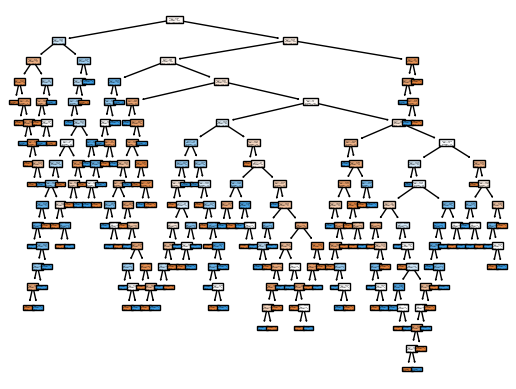

Logistic Regression Accuracy: 0.49523809523809526
Logistic Regression Confusion Matrix:
 [[65 46]
 [60 39]]
0.5
Best model saved as 'best_model.pkl'


In [11]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle


# Reading dataset
df = pd.read_csv('/content/Cyber_Threat_Detection.csv')
df.head()
# See the no. of rows and columns
df.shape
df.dtypes
df.describe()
# Remove unwanted columns
df.drop(columns=['Activity_ID', 'User_Agent','Activity_Time','Bytes_Transferred'], inplace=True) # specify the columns to remove
data_cols = df.columns.tolist()
print(data_cols)
#dataset info after  removing unwanted features
df.info()
# find the null values
df.isnull().sum()
# Fill numerical columns with mean and categorical columns with the mode
num_columns = df.select_dtypes(include=['float64']).columns
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())

# find the null values
df.isnull().sum()

#categorical columns
cat_columns = df.select_dtypes(include=['object']).columns
df[cat_columns]=df[cat_columns].fillna(df[cat_columns].mode().iloc[0])
df.isnull().sum()

# Encode categorical features using Label Encoding
label_encoder = LabelEncoder()
for column in cat_columns:
 df[column] = label_encoder.fit_transform(df[column])
#display contents
df
# Scale numerical features with MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])
#display contents
df

# create 2 tables without threat_level and only threat_level as target
X = df.drop('Threat_Level', axis=1) # -- independent variable
y = df['Threat_Level']

#training
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)

#Train Random Forest Classifier model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Evaluate Random Forest Classifier model
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)


# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

# Train Logistic Regression model
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)
# Evaluate Logistic Regression model
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

# Select the best model
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model
best_accuracy = logreg_accuracy if logreg_accuracy > rf_accuracy else rf_accuracy
print(best_accuracy)

# Save the best model as a .pkl file
with open('best_model.pkl', 'wb') as file:
 pickle.dump(best_model, file)
print("Best model saved as 'best_model.pkl'")